# Random Forest - BMD Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing CSV

In [2]:
bmd = pd.read_csv('../../bmd/bmd.csv')

In [3]:
bmd.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


# Analyzing numeric columns

In [4]:
bmd.describe()

,id,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,64.665680,160.254438,19.739645,0.783104
std,8744.623598,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.000000,35.814058,36.000000,142.000000,5.000000,0.407600
25%,2018.000000,54.424211,56.000000,154.000000,9.000000,0.670800
50%,6702.000000,63.487837,64.500000,160.500000,14.000000,0.786100
75%,17100.000000,72.080558,73.000000,166.000000,24.000000,0.888800
max,24208.000000,88.753795,96.000000,177.000000,96.000000,1.362400


In [5]:
bmd.groupby('fracture').mean()

# id: To be removed
# Age: The oldest you get, the biggest the probability to fracture.
# Weight: A higher weight helps preventing a fracture.
# Height: It does not really impact.
# Waiting time (time the patient had to wait for the densitometry (in minutes): the longest the time, the more probability to fracture.
# Bdm (bone mineral density): The most dense your bones ares, the less likely they are to fracture.

,id,age,weight_kg,height_cm,waiting_time,bmd
fracture,,,,,,
fracture,7869.040000,69.771320,58.410000,159.290000,23.300000,0.623308
no fracture,9620.840336,61.051787,67.294118,160.659664,18.243697,0.850245


# Analyzing string columns

In [6]:
cross_sex = pd.crosstab(bmd['fracture'], bmd['sex'])
cross_sex

# There is not a lot of difference between Men and Women

sex,F,M
fracture,,
fracture,25,25
no fracture,58,61


In [7]:
Female_Fracture = cross_sex['F']['fracture'] / (cross_sex['F']['fracture']  + cross_sex['F']['no fracture'])
Female_Fracture

0.30120481927710846

In [8]:
Male_Fracture = cross_sex['M']['fracture'] / (cross_sex['M']['fracture']  + cross_sex['M']['no fracture'])
Male_Fracture

0.29069767441860467

In [9]:
cross_med = pd.crosstab(bmd['fracture'], bmd['medication'])
cross_med

# Medication prevents fractures, especially for Gluco. For Anticonvulsant there are not many cases.

medication,Anticonvulsant,Glucocorticoids,No medication
fracture,,,
fracture,4,5,41
no fracture,5,19,95


In [10]:
Anticonvulsant_fracture = cross_med['Anticonvulsant']['fracture'] / (cross_med['Anticonvulsant']['fracture']  
+ cross_med['Anticonvulsant']['no fracture'])

Anticonvulsant_fracture

0.4444444444444444

In [11]:
Glucocorticoids_fracture = cross_med['Glucocorticoids']['fracture'] / (cross_med['Glucocorticoids']['fracture']  
+ cross_med['Glucocorticoids']['no fracture'])

Glucocorticoids_fracture

0.20833333333333334

In [12]:
No_medication_fracture = cross_med['No medication']['fracture'] / (cross_med['No medication']['fracture']  
+ cross_med['No medication']['no fracture'])

No_medication_fracture

0.3014705882352941

# Removing columns "id" and sending "fracture" column to the end.

In [13]:
cols = bmd.columns.values.tolist()
cols

['id',
 'age',
 'sex',
 'fracture',
 'weight_kg',
 'height_cm',
 'medication',
 'waiting_time',
 'bmd']

In [14]:
cols_new = ['age',
 'sex',
 'weight_kg',
 'height_cm',
 'medication',
 'waiting_time',
 'bmd',
 'fracture']

In [15]:
bmd = bmd[cols_new]

In [16]:
dum_sex = pd.get_dummies(bmd['sex'], prefix = 'sex')
new_bmd = bmd.join(dum_sex)

In [17]:
dum_med = pd.get_dummies(new_bmd['medication'], prefix = 'medication')
new_bmd = new_bmd.join(dum_med)
new_bmd.head(3)

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,fracture,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,57.052768,F,64.0,155.5,Anticonvulsant,18,0.8793,no fracture,1,0,1,0,0
1,75.741225,F,78.0,162.0,No medication,56,0.7946,no fracture,1,0,0,0,1
2,70.778900,M,73.0,170.5,No medication,10,0.9067,no fracture,0,1,0,0,1


In [18]:
cols = new_bmd.columns.values.tolist()
cols

['age',
 'sex',
 'weight_kg',
 'height_cm',
 'medication',
 'waiting_time',
 'bmd',
 'fracture',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [19]:
cols_new = ['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'fracture',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [20]:
new_bmd = new_bmd[cols_new]

In [21]:
new_bmd.head(5)

,age,weight_kg,height_cm,waiting_time,bmd,fracture,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,57.052768,64.0,155.5,18,0.8793,no fracture,1,0,1,0,0
1,75.741225,78.0,162.0,56,0.7946,no fracture,1,0,0,0,1
2,70.778900,73.0,170.5,10,0.9067,no fracture,0,1,0,0,1
3,78.247175,60.0,148.0,14,0.7112,no fracture,1,0,0,0,1
4,54.191877,55.0,161.0,20,0.7909,no fracture,0,1,0,0,1


In [22]:
# We change the Fracture columns from string to numeric. True=1, False=0.

new_bmd['fracture'] = (new_bmd['fracture'] == 'fracture').astype(int)

In [23]:
new_bmd.head(5)

,age,weight_kg,height_cm,waiting_time,bmd,fracture,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,57.052768,64.0,155.5,18,0.8793,0,1,0,1,0,0
1,75.741225,78.0,162.0,56,0.7946,0,1,0,0,0,1
2,70.778900,73.0,170.5,10,0.9067,0,0,1,0,0,1
3,78.247175,60.0,148.0,14,0.7112,0,1,0,0,0,1
4,54.191877,55.0,161.0,20,0.7909,0,0,1,0,0,1


In [24]:
new_bmd.fracture.value_counts()

0    119
1     50
Name: fracture, dtype: int64


# Select columns to build the model

In [25]:
new_bmd.columns.values.tolist()

['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'fracture',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [26]:
predictors = ['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

target = ['fracture']

# We put under X the columns to be used as predictors.
# Y is the column we want to predict

# We evaluate dtypes and assign numeric type to them

In [27]:
new_bmd.dtypes

age                           float64
weight_kg                     float64
height_cm                     float64
waiting_time                    int64
bmd                           float64
fracture                        int32
sex_F                           uint8
sex_M                           uint8
medication_Anticonvulsant       uint8
medication_Glucocorticoids      uint8
medication_No medication        uint8
dtype: object

In [28]:
new_bmd['sex_F'] = (new_bmd['sex_F'] == 'sex_F').astype(int)
new_bmd['sex_M'] = (new_bmd['sex_M'] == 'sex_M').astype(int)
new_bmd['medication_Anticonvulsant'] = (new_bmd['medication_Anticonvulsant'] == 'medication_Anticonvulsant').astype(int)
new_bmd['medication_Glucocorticoids'] = (new_bmd['medication_Glucocorticoids'] == 'medication_Glucocorticoids').astype(int)
new_bmd['medication_No medication'] = (new_bmd['medication_No medication'] == 'medication_No medication').astype(int) 
new_bmd.dtypes

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age                           float64
weight_kg                     float64
height_cm                     float64
waiting_time                    int64
bmd                           float64
fracture                        int32
sex_F                           int32
sex_M                           int32
medication_Anticonvulsant       int32
medication_Glucocorticoids      int32
medication_No medication        int32
dtype: object

# Split Dataset

In [70]:
new_bmd['is_train'] = np.random.uniform(1,0,len(new_bmd))<0.75

In [71]:
train,test = new_bmd[new_bmd['is_train']==True], new_bmd[new_bmd['is_train']==False]

In [72]:
len(train)

127

In [73]:
len(test)

42

# Apply Algorithms

## Decision Tree Classifier : Building Model

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=2, max_depth = 2, random_state=99)

In [76]:
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [77]:
preds = tree.predict(test[predictors])

In [78]:
tree.score(test[predictors], test[target])

0.8333333333333334

## Decision Tree Classifier: Validation

In [79]:
Validation = test[target]

In [80]:
Validation['Prediction'] = preds
Validation.head()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fracture,Prediction
0,0,0
1,0,0
7,0,0
35,0,0
37,0,0


In [81]:
ValidationCrosstab = pd.crosstab(Validation['fracture'], Validation['Prediction'])

In [82]:
ValidationCrosstab

Prediction,0,1
fracture,,
0,22,3
1,4,13


In [83]:
print('Number of times where a No Fracture was predicted as a No Fracture:')
print(ValidationCrosstab[0][0])
print('Number of times where a No Fracture was predicted as a No Fracture:')
print(ValidationCrosstab[0][1])
print('Number of times where a No Fracture was predicted as a No Fracture:')
print(ValidationCrosstab[1][1])
print('Number of times where a No Fracture was predicted as a No Fracture:')
print(ValidationCrosstab[1][0])

Number of times where a No Fracture was predicted as a No Fracture:
22
Number of times where a No Fracture was predicted as a No Fracture:
4
Number of times where a No Fracture was predicted as a No Fracture:
13
Number of times where a No Fracture was predicted as a No Fracture:
3


In [84]:
Score = ((ValidationCrosstab[0][0]) + (ValidationCrosstab[1][1])) / ((ValidationCrosstab[0][1]) + (ValidationCrosstab[1][0]) + (ValidationCrosstab[0][0]) + (ValidationCrosstab[1][1]))
Score

0.8333333333333334

## Decision Tree Classifier: Visualization

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


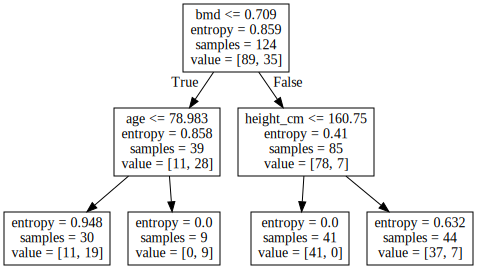

In [44]:
from sklearn.tree import export_graphviz
with open("../../../notebooks/resources/bmd_dtree.dot","w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
from graphviz import Source
file = open("../../../notebooks/resources/bmd_dtree.dot","r")
text = file.read()
import sys
print(sys.version)
Source(text)

## Cross Validation: Building Model

In [45]:
from sklearn.model_selection import KFold

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
X = new_bmd[predictors]
Y = new_bmd[target]

In [48]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=5, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [49]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [50]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([0.76470588, 0.82352941, 1.        , 0.70588235, 0.82352941,
       0.82352941, 0.94117647, 0.76470588, 0.76470588, 0.8125    ])

In [51]:
score = np.mean(scores)
score

0.8224264705882351

In [52]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=5, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)

Score para i =  1  es de  0.8878676470588236
Score para i =  2  es de  0.8878676470588236
Score para i =  3  es de  0.8702205882352942
Score para i =  4  es de  0.8279411764705882
Score para i =  5  es de  0.8224264705882351
Score para i =  6  es de  0.7691176470588236
Score para i =  7  es de  0.786764705882353
Score para i =  8  es de  0.7808823529411766
Score para i =  9  es de  0.7926470588235295
Score para i =  10  es de  0.7926470588235295


In [53]:
# Ideal max_depth will equal 2. 

## Random Forest: Building Model

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest = RandomForestClassifier(n_jobs=2, oob_score = True, n_estimators=10000)
forest.fit(train[predictors], train[target])
forest.oob_score_

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8503937007874016